In [1]:
# Import all libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load Data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
# Create a DataFrame with the data
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [6]:
# Check for missing values after filling
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

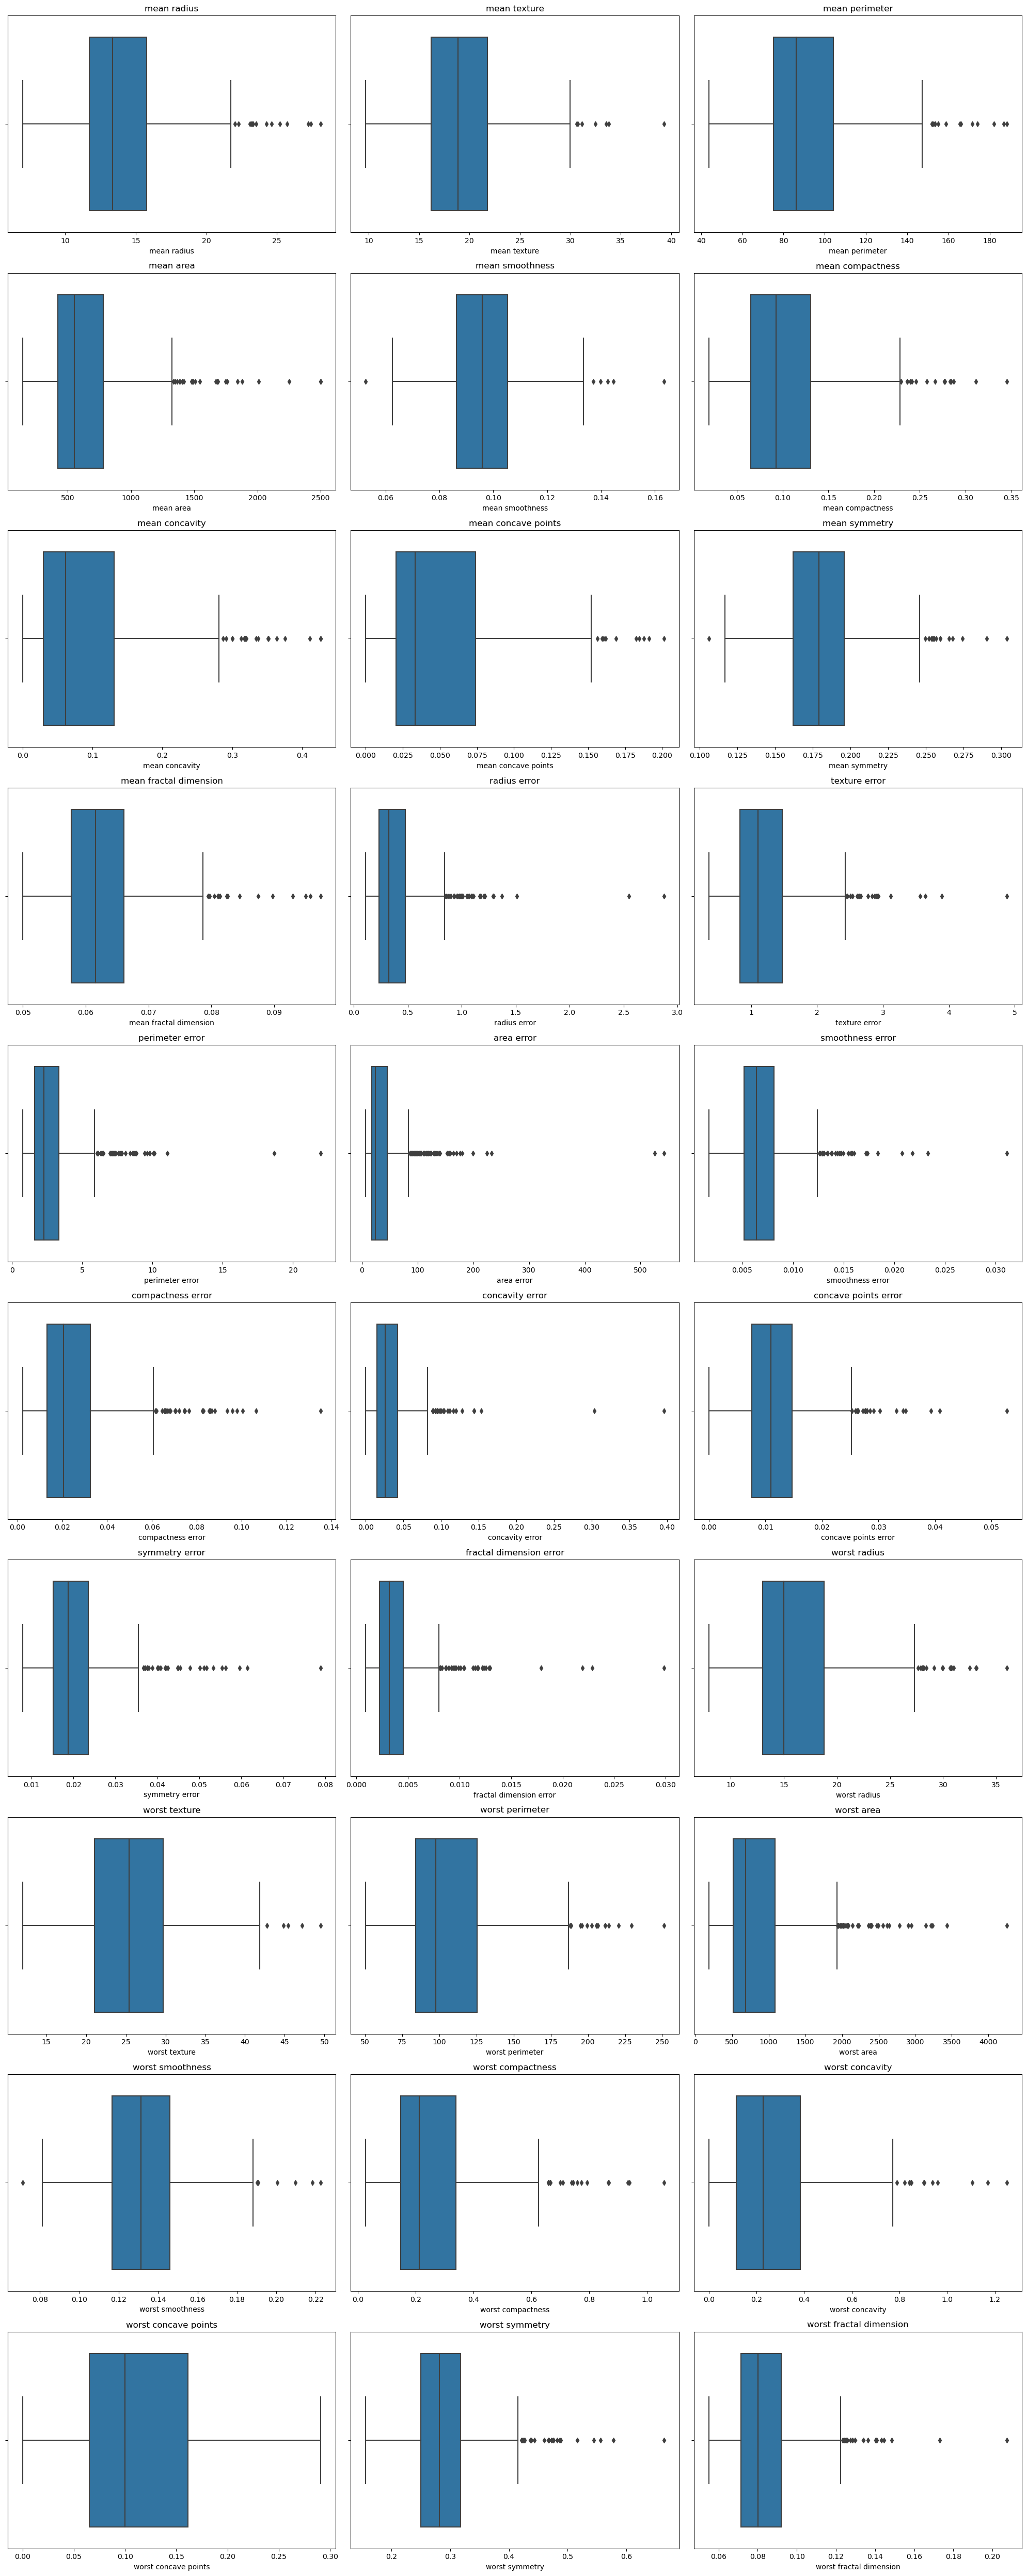

In [7]:
# Check for outliers
# Create a boxplot for each feature, excluding the target variable
num_features = len(df.columns) - 1  # Exclude the target variable
num_cols = 3
num_rows = (num_features // num_cols) + (num_features % num_cols)

plt.figure(figsize=(20, num_rows * 5))

# Skip the target variable
for i, feature in enumerate(df.columns[:-1], 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[feature])
    plt.title(feature, fontsize=12)

plt.tight_layout()
plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 [Text(0.5, 0, 'mean radius'),
  Text(1.5, 0, 'mean texture'),
  Text(2.5, 0, 'mean perimeter'),
  Text(3.5, 0, 'mean area'),
  Text(4.5, 0, 'mean smoothness'),
  Text(5.5, 0, 'mean compactness'),
  Text(6.5, 0, 'mean concavity'),
  Text(7.5, 0, 'mean concave points'),
  Text(8.5, 0, 'mean symmetry'),
  Text(9.5, 0, 'mean fractal dimension'),
  Text(10.5, 0, 'radius error'),
  Text(11.5, 0, 'texture error'),
  Text(12.5, 0, 'perimeter error'),
  Text(13.5, 0, 'area error'),
  Text(14.5, 0, 'smoothness error'),
  Text(15.5, 0, 'compactness error'),
  Text(16.5, 0, 'concavity error'),
  Text(17.5, 0, 'concave points error'),
  Text(18.5, 0, 'symmetry error'),
  Text(19.5, 0, 'fractal dimension error'),
  Text(20.5, 0, 'worst radius'),
  Text(21.5, 0, 'worst texture'),
  Text(22.5

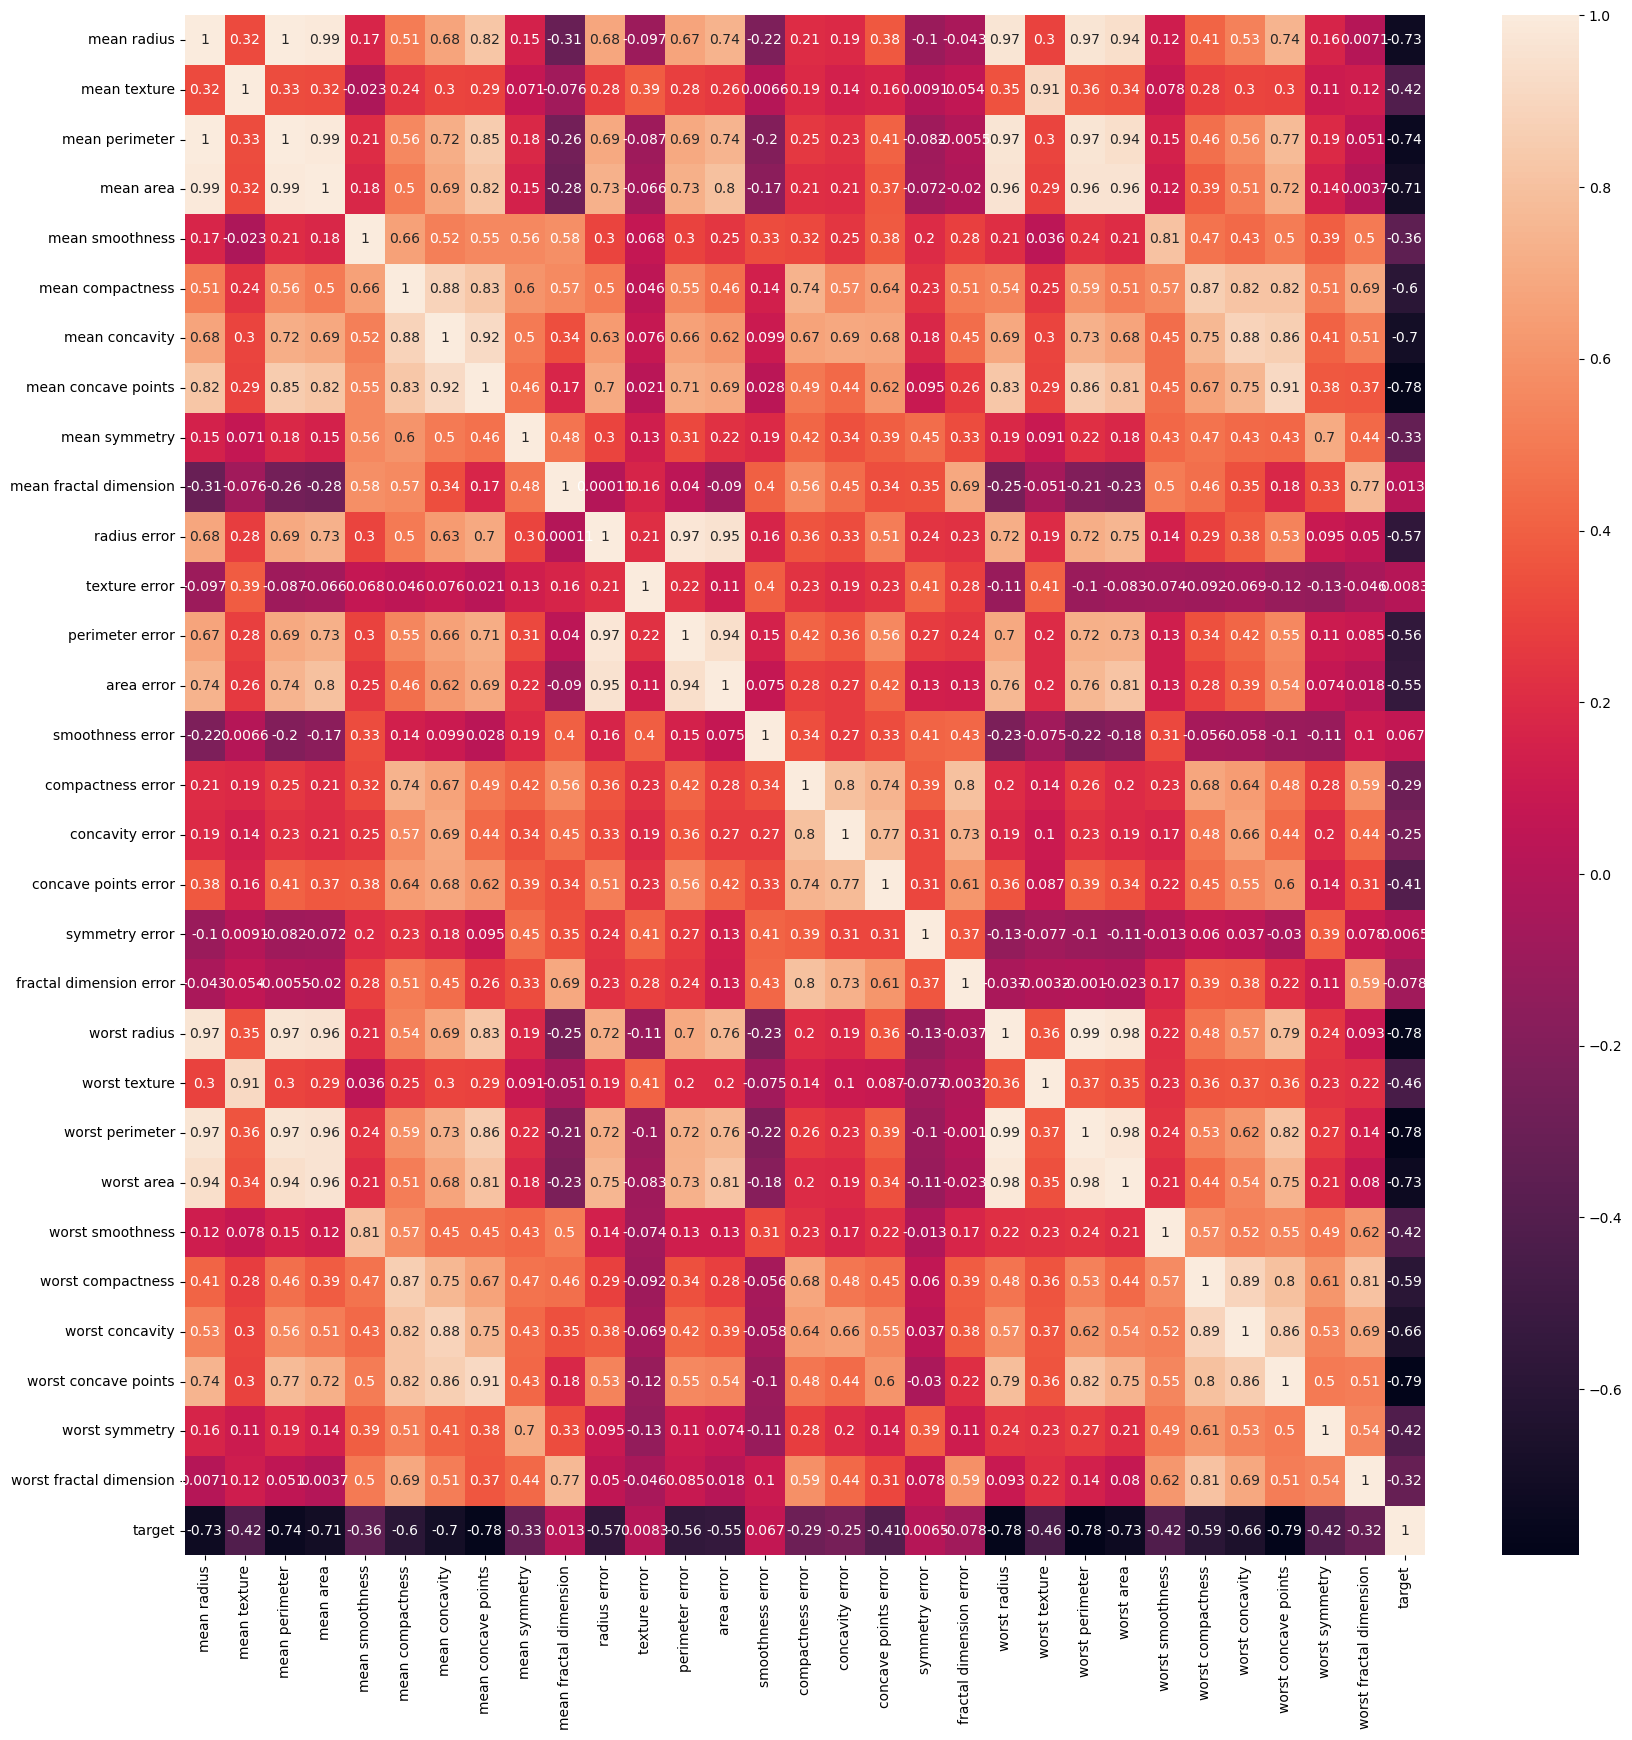

In [8]:
# Heatmap of data
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)
plt.xticks(rotation = 90)

In [9]:
import plotly.express as px

# Set template to dark
px.defaults.template = "plotly_dark"

# Plot scatter matrix with plotly
fig = px.scatter_matrix(df, dimensions=df.columns[:-1], color='target')
fig.show()

C:\Users\SONY\anaconda3\lib\site-packages\plotly\express\_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


In [10]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
data.target.shape

(569,)

In [13]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
# Splitting dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)

In [15]:
N, D = X_train.shape
N, D

(381, 30)

In [16]:
# Using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Building Model
model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(D,)), tf.keras.layers.Dense(1, activation='sigmoid')])

In [18]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [19]:
# Iteration
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100)

Epoch 1/100


12/12 [==============================] - 3s 56ms/step - loss: 0.5001 - accuracy: 0.7822 - val_loss: 0.4618 - val_accuracy: 0.8245
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 0.4655 - accuracy: 0.8005 - val_loss: 0.4303 - val_accuracy: 0.8511
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4344 - accuracy: 0.8163 - val_loss: 0.4024 - val_accuracy: 0.8617
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.4077 - accuracy: 0.8373 - val_loss: 0.3774 - val_accuracy: 0.8777
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.3839 - accuracy: 0.8451 - val_loss: 0.3555 - val_accuracy: 0.8936
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.3628 - accuracy: 0.8583 - val_loss: 0.3361 - val_accuracy: 0.8989
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.3450 - accuracy: 0.8609 - val_loss: 0.3180 - val_accuracy: 0.9096
Epoch 8/1

12/12 [==============================] - 0s 10ms/step - loss: 0.1202 - accuracy: 0.9738 - val_loss: 0.0984 - val_accuracy: 0.9787
Epoch 56/100
12/12 [==============================] - 0s 9ms/step - loss: 0.1191 - accuracy: 0.9738 - val_loss: 0.0974 - val_accuracy: 0.9840
Epoch 57/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1179 - accuracy: 0.9738 - val_loss: 0.0964 - val_accuracy: 0.9840
Epoch 58/100
12/12 [==============================] - 0s 9ms/step - loss: 0.1168 - accuracy: 0.9764 - val_loss: 0.0954 - val_accuracy: 0.9840
Epoch 59/100
12/12 [==============================] - 0s 11ms/step - loss: 0.1157 - accuracy: 0.9764 - val_loss: 0.0944 - val_accuracy: 0.9840
Epoch 60/100
12/12 [==============================] - 0s 10ms/step - loss: 0.1146 - accuracy: 0.9764 - val_loss: 0.0935 - val_accuracy: 0.9840
Epoch 61/100
12/12 [==============================] - 0s 11ms/step - loss: 0.1136 - accuracy: 0.9764 - val_loss: 0.0927 - val_accuracy: 0.9894
Epoch 62/100
12

In [20]:
# Show Train Score and Test Score
print('Train score:', model.evaluate(X_train, y_train))
print('Test score:', model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 4ms/step - loss: 0.0889 - accuracy: 0.9895
Train score: [0.08885550498962402, 0.9895012974739075]
6/6 [==============================] - 0s 4ms/step - loss: 0.0720 - accuracy: 0.9894
Test score: [0.07196589559316635, 0.9893617033958435]


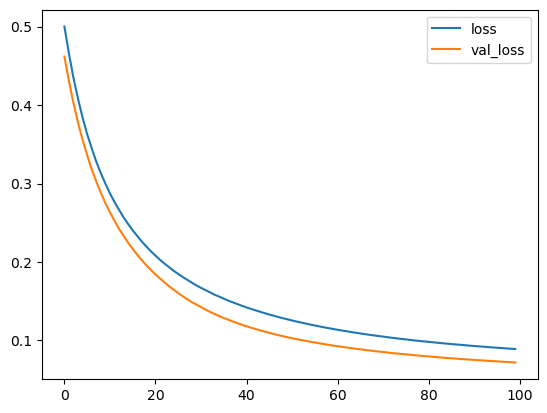

In [21]:
# Plot loss vs val_loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

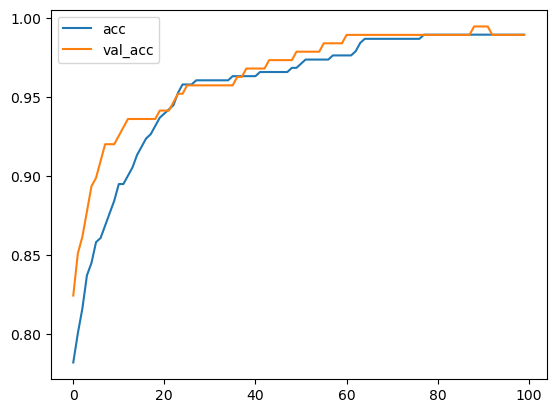

In [22]:
# Plot accuracy vs val_accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()